#Import libraries

In [172]:
# import tensorflow 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.8.0


In [173]:
#import additional libraries
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#for splitting the data into training and test set 
from sklearn.model_selection import train_test_split
# For Normalization
from sklearn.preprocessing import MinMaxScaler

#Load data

In [174]:
#Loading data from a csv file 
df=pd.read_csv('/content/salary_dataset.csv')
df.head()

,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
0,Jennifer Hernandez,120-602-1220,3.0,Msc,Tier2,Mid,Yes,25/08/1972,98000
1,Timothy Walker,840-675-8650,5.0,PhD,Tier2,Senior,Yes,03/12/2013,135500
2,David Duran,556-293-8643,5.0,Msc,Tier2,Senior,Yes,19/07/2002,123500
3,Gloria Ortega,463-559-7474,3.0,Bsc,Tier3,Mid,No,19/02/1970,85000
4,Matthew Steele,968-091-7683,5.0,Bsc,Tier2,Senior,Yes,20/02/1970,111500


In [175]:
#Loaing from the course github account 
df=pd.read_csv('https://raw.githubusercontent.com/oluwole-packt/datasets/main/salary_dataset.csv')
df.head()


,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
0,Jennifer Hernandez,120-602-1220,3.0,Msc,Tier2,Mid,Yes,25/08/1972,98000
1,Timothy Walker,840-675-8650,5.0,PhD,Tier2,Senior,Yes,03/12/2013,135500
2,David Duran,556-293-8643,5.0,Msc,Tier2,Senior,Yes,19/07/2002,123500
3,Gloria Ortega,463-559-7474,3.0,Bsc,Tier3,Mid,No,19/02/1970,85000
4,Matthew Steele,968-091-7683,5.0,Bsc,Tier2,Senior,Yes,20/02/1970,111500


#Data preprocessing

In [176]:
#check some random samples 
df.sample(10)


,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
109,Anita Anderson,615-620-8027,2.0,Bsc,Tier3,Junior,No,06/08/1977,63500
222,Lori Garcia,860-230-7451,5.0,PhD,Tier3,Senior,No,29/08/1984,134500
72,Donald Perkins,708-475-1763,NaN,PhD,Tier2,Senior,No,12/04/1990,128500
174,Michael Curry,651-904-7881,5.0,Msc,Tier1,Senior,No,02/07/1991,112500
179,Brittany Burke,802-306-8873,1.0,Bsc,Tier3,Junior,No,14/08/2019,59500
40,Robert Jones,294-128-9328,2.0,Bsc,Tier3,Junior,Yes,10/08/1987,70500
53,Kristopher Taylor,449-425-0672,5.0,Msc,Tier2,Senior,Yes,19/04/1973,123500
209,Miss Jamie Mitchell DDS,580-059-9986,1.0,Bsc,Tier1,Junior,Yes,23/03/1994,56500
43,Whitney Moore,294-513-7323,5.0,Msc,Tier1,NaN,No,19/10/1999,112500
162,Katherine Morton,929-838-5203,5.0,Msc,Tier3,Senior,Yes,30/10/1973,129500


In [177]:
#check the data for any missing values 
df.isnull().sum()

Name             0
Phone_Number     0
Experience       2
Qualification    1
University       0
Role             3
Cert             2
Date_Of_Birth    0
Salary           0
dtype: int64

In [178]:
#drop the null values 
df=df.dropna()

The number of missing values are quite small, in this scenario we drop the missing values. There are other methods of handling missing values. Although the exam will focus more on testing your modelling skills, data preprocessing will come in handy as a data professional, so I will refer you to this excellent book on data preprocessing by packt, Hands-On Data Preprocessing in Python: Learn how to effectively prepare data for successful data analytics by Roy Jafari.

In [179]:
#check for null values 
df.isnull().sum()

Name             0
Phone_Number     0
Experience       0
Qualification    0
University       0
Role             0
Cert             0
Date_Of_Birth    0
Salary           0
dtype: int64

In [180]:
df.columns

Index(['Name', 'Phone_Number', 'Experience', 'Qualification', 'University',
       'Role', 'Cert', 'Date_Of_Birth', 'Salary'],
      dtype='object')

In [181]:
#drop irrelevant columns 
df =df.drop(columns =['Name', 'Phone_Number','Date_Of_Birth'])

In [182]:
#its good practice to check your data
df.head()

,Experience,Qualification,University,Role,Cert,Salary
0,3.0,Msc,Tier2,Mid,Yes,98000
1,5.0,PhD,Tier2,Senior,Yes,135500
2,5.0,Msc,Tier2,Senior,Yes,123500
3,3.0,Bsc,Tier3,Mid,No,85000
4,5.0,Bsc,Tier2,Senior,Yes,111500


In [183]:
#Converting categorical variables to numeric values 
df = pd.get_dummies(df, drop_first=True)
df.head()


,Experience,Salary,Qualification_Msc,Qualification_PhD,University_Tier2,University_Tier3,Role_Mid,Role_Senior,Cert_Yes
0,3.0,98000,1,0,1,0,1,0,1
1,5.0,135500,0,1,1,0,0,1,1
2,5.0,123500,1,0,1,0,0,1,1
3,3.0,85000,0,0,0,1,1,0,0
4,5.0,111500,0,0,1,0,0,1,1


In [184]:
#checking for correlation in the data 
df.corr()

,Experience,Salary,Qualification_Msc,Qualification_PhD,University_Tier2,University_Tier3,Role_Mid,Role_Senior,Cert_Yes
Experience,1.000000,0.814831,0.120081,-0.044225,0.017854,-0.010583,-0.353572,0.889459,-0.002359
Salary,0.814831,1.000000,0.118207,0.365999,0.112023,0.057214,-0.156297,0.822280,0.150998
Qualification_Msc,0.120081,0.118207,1.000000,-0.363826,0.116238,-0.245785,-0.095579,0.112477,-0.033259
Qualification_PhD,-0.044225,0.365999,-0.363826,1.000000,0.142149,-0.054767,0.129437,-0.021039,-0.001612
University_Tier2,0.017854,0.112023,0.116238,0.142149,1.000000,-0.448447,-0.013210,0.030849,-0.003412
University_Tier3,-0.010583,0.057214,-0.245785,-0.054767,-0.448447,1.000000,-0.022069,-0.002311,0.016894
Role_Mid,-0.353572,-0.156297,-0.095579,0.129437,-0.013210,-0.022069,1.000000,-0.544499,0.020775
Role_Senior,0.889459,0.822280,0.112477,-0.021039,0.030849,-0.002311,-0.544499,1.000000,0.002759
Cert_Yes,-0.002359,0.150998,-0.033259,-0.001612,-0.003412,0.016894,0.020775,0.002759,1.000000


#Modelling 

In [185]:
# We split the attributes and labels into X and y variables 
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [186]:
# Create training and test sets
#We set the random state to ensure reproduciblility 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10) 

In [187]:
#Set random set for reproducibility  
tf.random.set_seed(10)
#create a model using the Keras API 
model =Sequential([Dense(units=1,input_shape=[len(X_train.columns)])])
#compile the model 
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics = ['mae'])
#Fit the model 
model.fit(X_train,y_train, epochs =50) 


Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 99116.2109 - mae: 99116.2109
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 99115.3672 - mae: 99115.3672
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 99114.5391 - mae: 99114.5391
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 99113.7109 - mae: 99113.7109
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 99112.8516 - mae: 99112.8516
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 99112.0234 - mae: 99112.0234
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 99111.1797 - mae: 99111.1797
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 99110.3359 - mae: 99110.3359
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 99109.5000 - mae: 99109.5000
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 99108.6562 - mae: 99108.6562
Epoch 11/

## Model 1 
We build a model with a single layer for 500 epochs 

In [188]:
#Set the random seed
tf.random.set_seed(10)
#create a model 
model1 =Sequential([Dense(units=1,input_shape=[len(X_train.columns)])])
#compile the model 
model1.compile(loss="mae", optimizer="SGD", metrics ="mae")
#fit the model 
history1= model1.fit(X_train,y_train, epochs =500) #number of times the model will go through training examples 


Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 99116.2109 - mae: 99116.2109
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 99115.3672 - mae: 99115.3672
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 99114.5391 - mae: 99114.5391
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 99113.7109 - mae: 99113.7109
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 99112.8516 - mae: 99112.8516
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 99112.0234 - mae: 99112.0234
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 99111.1797 - mae: 99111.1797
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 99110.3359 - mae: 99110.3359
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 99109.5000 - mae: 99109.5000
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 99108.6562 - mae: 99108.6562

In [189]:
#Model summary 
model1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [190]:
def visualize_model(history):
  #Lets visualize our model
  print(history.history.keys())
  # Lets plot the loss
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Number of epochs')
  plt.legend(['loss plot'], loc='upper right')
  plt.show()  

dict_keys(['loss', 'mae'])


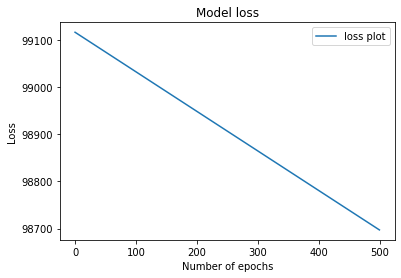

In [191]:
visualize_model(history)

We have this straight line showing the loss dropped all the way, perhaps we need to train it for more epochs to get a better result? Lets try 1000 epochs. 

## Model 2 
We build a model with a single layer for 1000 epochs 

In [192]:
#Set the random seed
tf.random.set_seed(10)
#create a model 
model2 =Sequential([Dense(units=1,input_shape=[len(X_train.columns)])])
#compile the model 
model2.compile(loss="mae", optimizer="SGD", metrics ="mae")
#fit the model 
history2= model2.fit(X_train,y_train, epochs =1000) #number of times the model will go through training examples 


Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 99116.2109 - mae: 99116.2109
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 99115.3672 - mae: 99115.3672
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 99114.5391 - mae: 99114.5391
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 99113.7109 - mae: 99113.7109
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 99112.8516 - mae: 99112.8516
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 99112.0234 - mae: 99112.0234
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 99111.1797 - mae: 99111.1797
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 99110.3359 - mae: 99110.3359
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 99109.5000 - mae: 99109.5000
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 99108.6562 - mae: 

dict_keys(['loss', 'mae'])


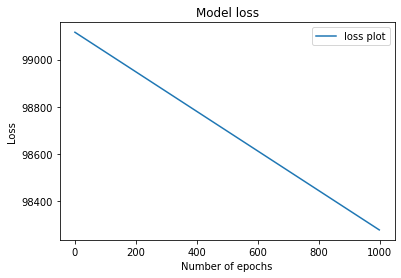

In [193]:
#Lets visualize our result 
visualize_model(history2)

Dont believe anything, try it for 5000 epochs and see if you could make any progress. 

## Model 3 

Lets add an extra layer at 500 epochs

In [194]:
#Set random set 
tf.random.set_seed(10)

#create a model 
model3 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                   Dense(units=1)
                   
                   ])
#compile the model 
model3.compile(loss="mae", optimizer="SGD", metrics = ['mae'])

#Fit the model 
history3 =model3.fit(
    X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 4ms/step - loss: 99116.8984 - mae: 99116.8984
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 99114.9922 - mae: 99114.9922
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 99112.6875 - mae: 99112.6875
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 99109.5234 - mae: 99109.5234
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 99104.8750 - mae: 99104.8750
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 99097.8750 - mae: 99097.8750
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 99087.1172 - mae: 99087.1172
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 99070.5078 - mae: 99070.5078
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 99044.7812 - mae: 99044.7812
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 99004.8438 - mae: 99004.8438

In [195]:
#Model summary 
model3.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 64)                576       
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'mae'])


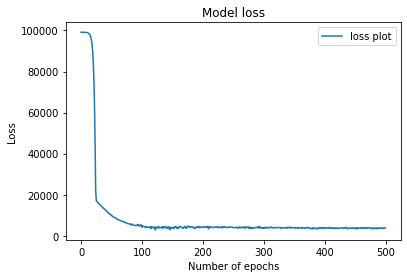

In [196]:
#Lets visualize our result 
visualize_model(history3)

Wow! The loss dropped to 3955.2666, after about 100 epochs nothing much seems to be happening. What if we add another extra layer? What do you think? 

## Model 4 
3 layers at 500 epochs

In [197]:
#Set random set 
tf.random.set_seed(25)

#create a model
model4 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=32, activation='relu'),
                    Dense(units=1)
                   
                   ])
#compile the model 
model4.compile(loss="mae", optimizer="SGD", metrics = "mae")
#fit the model 

history4 =model4.fit(
    X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 99117.8125 - mae: 99117.8125
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 99117.2188 - mae: 99117.2188
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 99116.8203 - mae: 99116.8203
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 99116.3984 - mae: 99116.3984
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 99115.7734 - mae: 99115.7734
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 99114.5625 - mae: 99114.5625
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 99111.9375 - mae: 99111.9375
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 99105.1484 - mae: 99105.1484
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 99080.2422 - mae: 99080.2422
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 98893.1875 - mae: 98893.1875

In [198]:
#Model summary 
model4.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                576       
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


Wow seems our model didnt perform any better than model 3

## Improving our prediction model 

To improve our model we apply normalization to bring all the attributes to scale so as not to mislead the model into thinking some attributes are of greater importance as this may not be the case. To understand this, lets look at the scale of our data again

In [199]:
df.describe()

,Experience,Salary,Qualification_Msc,Qualification_PhD,University_Tier2,University_Tier3,Role_Mid,Role_Senior,Cert_Yes
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,3.427386,98080.912863,0.294606,0.240664,0.377593,0.248963,0.215768,0.518672,0.518672
std,1.493010,23554.163839,0.456814,0.428376,0.485794,0.433312,0.412210,0.500691,0.500691
min,1.000000,49500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,78000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,104500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,5.000000,116500.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,141500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see experience is on a different scale while all the other values expect our target label are on a scale of 0 to 1 after we used one hot encoding. So lets normalize the data using the scikit learn library and see what happens

#Normalization

In [200]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_norm.head()

,Experience,Qualification_Msc,Qualification_PhD,University_Tier2,University_Tier3,Role_Mid,Role_Senior,Cert_Yes
0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [201]:
#lets check the scale again
X_norm.describe()

,Experience,Qualification_Msc,Qualification_PhD,University_Tier2,University_Tier3,Role_Mid,Role_Senior,Cert_Yes
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.606846,0.294606,0.240664,0.377593,0.248963,0.215768,0.518672,0.518672
std,0.373253,0.456814,0.428376,0.485794,0.433312,0.412210,0.500691,0.500691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now the scale are all the same, lets build the model using model 3 (our best model so far)

In [202]:
# Create training and test sets with the normalized data (X_norm)
X_train, X_test, y_train, y_test = train_test_split(X_norm, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

## Model 5

2layers for 1000 epochs and we try a RMSprop optimizer. Also we use callbacks to stop the training when no progress is been made. 

In [203]:
#Set random set 
tf.random.set_seed(10)
#create a model 
model5 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=64, activation ="relu"),
                    
                    Dense(units=1)
                   
                   ])
#compile the model 
model5.compile(loss="mae", optimizer=tf.keras.optimizers.RMSprop(0.001), metrics = ['mae'])
#fit the model 
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history5 =model5.fit(
    X_train, y_train, epochs=1000, callbacks=[early_stop])


Epoch 1/1000
6/6 [==============================] - 1s 5ms/step - loss: 97413.5234 - mae: 97413.5234
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 97412.6797 - mae: 97412.6797
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 97411.7266 - mae: 97411.7266
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 97410.6250 - mae: 97410.6250
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 97409.3125 - mae: 97409.3125
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 97407.7734 - mae: 97407.7734
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 97405.9688 - mae: 97405.9688
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 97403.8750 - mae: 97403.8750
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 97401.4766 - mae: 97401.4766
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 97398.7812 - mae: 

In [204]:
#Model summary 
model5.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 64)                576       
                                                                 
 dense_74 (Dense)            (None, 64)                4160      
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'mae'])


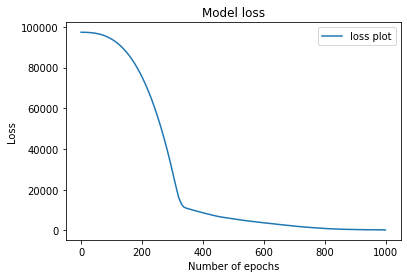

In [205]:
#Lets visualize our result 
visualize_model(history5)

## Model 6 
3 layers with Adam , 1000 epochs with callbacks 

In [206]:
#Set random set 
tf.random.set_seed(10)
#create a model 

model6 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=64, activation ="relu"),
                    
                    Dense(units=1)
                   
                   ])
#compile the model 
model6.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])
#fit the model 
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history6 =model6.fit(
    X_train, y_train, epochs=1000, callbacks=[early_stop])


Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 97413.7500 - mae: 97413.7500
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 97413.3828 - mae: 97413.3828
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 97412.9375 - mae: 97412.9375
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 97412.3828 - mae: 97412.3828
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 97411.6641 - mae: 97411.6641
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 97410.7500 - mae: 97410.7500
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 97409.5703 - mae: 97409.5703
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 97408.0391 - mae: 97408.0391
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 97406.1328 - mae: 97406.1328
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 97403.7109 - mae: 

In [207]:
#Model summary 
model6.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 64)                576       
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dense_78 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'mae'])


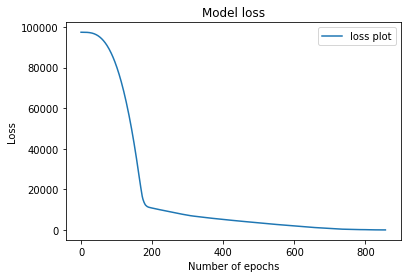

In [208]:
#Lets visualize our result 
visualize_model(history6)

## Model 7 
3 layers, 1000 epochs, SGD with callbacks 

In [209]:
#Set random set 
tf.random.set_seed(25)
#create a model 
model7 =Sequential([
                   Dense(units=64, activation='relu', input_shape=[len(X_train.columns)]),
                    Dense(units=64, activation ="relu"),
                   Dense(units=1)
                   
                   ])
#compile the model 
model7.compile(loss="mae", optimizer="SGD", metrics ="mae")
#fit the model 
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history7 =model7.fit(
    X_train, y_train, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 97414.0703 - mae: 97414.0703
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 97413.8828 - mae: 97413.8828
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 97413.6641 - mae: 97413.6641
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 97413.4453 - mae: 97413.4453
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 97413.2109 - mae: 97413.2109
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 97412.9141 - mae: 97412.9141
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 97412.5391 - mae: 97412.5391
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 97412.0703 - mae: 97412.0703
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 97411.4453 - mae: 97411.4453
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 97410.5625 - mae: 

In [210]:
#Model summary 
model7.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 64)                576       
                                                                 
 dense_80 (Dense)            (None, 64)                4160      
                                                                 
 dense_81 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


After we normalized the data we recorded amazing results on the training data, now is the moment of truth. Lets evaluate our model on test dat (unseen data). If you are ready? Then lets go! 

In [211]:
def eval_testing(model):
  return model.evaluate(X_test, y_test)
models = [model1, model2, model3, model4, model5, model6, model7]
for x in models: 
  eval_testing(x)

2/2 [==============================] - 0s 6ms/step - loss: 29844.7852 - mae: 29844.7852


From our evaluation test, model 6 is the model we will be using to make predictions. Since it has the lowest error on the test set. 

#Making Predictions 

In [212]:
#Lets make predictions on our test data
y_preds=model6.predict(X_test).flatten()
y_preds

array([ 64479.01 , 131472.39 , 116481.81 ,  72474.55 , 102996.43 ,
        60476.66 ,  84481.33 , 119465.59 , 112479.47 ,  63483.24 ,
        77977.16 ,  84485.305, 112479.47 ,  90989.63 ,  87487.91 ,
       100481.59 , 135474.73 , 112483.45 , 119465.59 , 131472.39 ,
       108986.78 , 117460.414,  80482.95 , 123467.945, 112479.47 ,
       117460.414, 111974.52 ,  78991.75 , 135474.73 , 129458.3  ,
       117460.42 , 119465.59 , 100481.59 , 113462.05 , 101985.79 ,
       113462.05 ,  93973.41 ,  65488.426,  61491.266, 107467.71 ,
       105980.2  , 106475.92 ,  72478.51 , 135474.73 ,  67481.61 ,
       107467.71 , 117460.414,  70469.36 ,  57488.918], dtype=float32)

In [213]:
#Lets make a dataframe to compare our prediction with the ground truth
df_predictions = pd.DataFrame({'Ground_Truth': y_test, 'Model_prediction': y_preds}, columns=[ 'Ground_Truth', 'Model_prediction'])
df_predictions['Model_prediction']= df_predictions['Model_prediction'].astype(int)

In [214]:
#Lets see the difference in values 
df_predictions['diff']=df_predictions['Ground_Truth']-df_predictions['Model_prediction']

In [215]:
#Lets look at 10 samples 
df_predictions.sample(10)

,Ground_Truth,Model_prediction,diff
145,61500,61491,9
233,112500,112479,21
6,131500,131472,28
202,65500,65488,12
152,100500,100481,19
134,113500,113462,38
18,102000,101985,15
40,70500,70469,31
216,72500,72474,26
125,106500,106475,25


#Saving the model 

Now we have a model that works really well. How about we save the model? 

In [216]:
#Saving the model in one line of code
model6.save('salarypredictor.h5')
#Alternate method is 
#model6.save('salarypredictor') 

# Loading the model

In [217]:
#loading the model 
saved_model =tf.keras.models.load_model("/content/salarypredictor.h5")
saved_model

For method 2. you will have to load the file path. 

In [218]:
#View the model summary of our saved model
saved_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 64)                576       
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dense_78 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [219]:
#testing out our model 
y_preds=saved_model.predict(X_test).flatten()
y_preds

array([ 64479.01 , 131472.39 , 116481.81 ,  72474.55 , 102996.43 ,
        60476.66 ,  84481.33 , 119465.59 , 112479.47 ,  63483.24 ,
        77977.16 ,  84485.305, 112479.47 ,  90989.63 ,  87487.91 ,
       100481.59 , 135474.73 , 112483.45 , 119465.59 , 131472.39 ,
       108986.78 , 117460.414,  80482.95 , 123467.945, 112479.47 ,
       117460.414, 111974.52 ,  78991.75 , 135474.73 , 129458.3  ,
       117460.42 , 119465.59 , 100481.59 , 113462.05 , 101985.79 ,
       113462.05 ,  93973.41 ,  65488.426,  61491.266, 107467.71 ,
       105980.2  , 106475.92 ,  72478.51 , 135474.73 ,  67481.61 ,
       107467.71 , 117460.414,  70469.36 ,  57488.918], dtype=float32)

In [220]:
#create a dataframe as before
df_predictions = pd.DataFrame({'Ground_Truth': y_test, 'Model_prediction': y_preds}, columns=[ 'Ground_Truth', 'Model_prediction'])
df_predictions['Model_prediction']= df_predictions['Model_prediction'].astype(int)

In [221]:
df_predictions.tail()

,Ground_Truth,Model_prediction
201,67500,67481
74,107500,107467
235,117500,117460
40,70500,70469
186,57500,57488


Everything works perfectly 

In [225]:
#Putting everything into a function for our big task 
def salary_predictor(df):
  df_hires= df.drop(columns=['Name', 'Phone_Number','Date_Of_Birth' ])
  df_hires = pd.get_dummies(df_hires, drop_first=True)
  X_norm = pd.DataFrame(scaler.fit_transform(df_hires), columns=df.columns)
  y_preds=saved_model.predict(X_norm).flatten()
  df_predictions = pd.DataFrame({ 'Model_prediction': y_preds}, columns=[ 'Model_prediction'])
  df_predictions['Model_prediction']= df_predictions['Model_prediction'].astype(int)
  df['Salary']=df_predictions['Model_prediction']
  return df

Lets load the data for our 7 new hires and see what we should pay them 

In [226]:
#Load the data
df_new=pd.read_csv('https://raw.githubusercontent.com/oluwole-packt/datasets/main/new_hires.csv')
df_new

,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth
0,Alvaro Johnson,320-636-8883,7,Bsc,Tier1,Senior,No,12/03/1978
1,Austin Powers,903-121-1691,2,Msc,Tier1,Mid,Yes,13/03/1992
2,Joshua Phil,673-972-2453,3,Bsc,Tier3,Mid,Yes,19/02/1988
3,Mirinda Collins,310-364-6925,5,Msc,Tier2,Senior,No,20/03/1989
4,Mustapha Green,401-249-3912,3,PhD,Tier1,Junior,Yes,21/03/1979
5,Nick Freeman,875-546-2104,6,Bsc,Tier3,Junior,Yes,22/03/1982
6,Pamela Allison,408-955-5085,2,PhD,Tier2,Junior,No,23/03/1968


In [227]:
#Lets see how much
salary_predictor(df_new)

,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
0,Alvaro Johnson,320-636-8883,7,Bsc,Tier1,Senior,No,12/03/1978,100481
1,Austin Powers,903-121-1691,2,Msc,Tier1,Mid,Yes,13/03/1992,85976
2,Joshua Phil,673-972-2453,3,Bsc,Tier3,Mid,Yes,19/02/1988,87170
3,Mirinda Collins,310-364-6925,5,Msc,Tier2,Senior,No,20/03/1989,110084
4,Mustapha Green,401-249-3912,3,PhD,Tier1,Junior,Yes,21/03/1979,83681
5,Nick Freeman,875-546-2104,6,Bsc,Tier3,Junior,Yes,22/03/1982,79265
6,Pamela Allison,408-955-5085,2,PhD,Tier2,Junior,No,23/03/1968,77499


Now have successfully wrapped up the task. With a very high accuracy. So HR over to you and we need a payraise 😀

Lets move on to the next task. 